In [2]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import PIL
import numpy as np
import keras
TRAINING_DIR = r"E:\Machine_Learning\PROJECTS\FireDetection\DATA\DATA\image\train"
training_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip=True,
                                  rotation_range=30,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
VALIDATION_DIR = r"E:\Machine_Learning\PROJECTS\FireDetection\DATA\DATA\image\validation\Fire-Detection"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                         target_size=(224,224),
                                         class_mode='categorical',
                                         batch_size = 16)
validation_generator = validation_datagen.flow_from_directory(      
                                           VALIDATION_DIR,
                                           target_size=(224,224),
                                           class_mode='categorical',
                                           batch_size= 16)

Found 47192 images belonging to 2 classes.
Found 651 images belonging to 2 classes.


In [2]:
from tensorflow.keras.optimizers import Adam
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2048, activation='relu'),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(2, activation='sigmoid')])


In [3]:
model.compile(loss='binary_crossentropy',
optimizer=Adam(learning_rate=0.0001),
metrics=['acc'])


In [ ]:
history = model.fit(
train_generator,
steps_per_epoch = 15,
epochs = 50,
validation_data = validation_generator,
validation_steps = 15
)

Epoch 1/50
15/15 [==============================] - 46s 3s/step - loss: 0.6899 - acc: 0.5417 - val_loss: 0.7171 - val_acc: 0.2000
Epoch 2/50
15/15 [==============================] - 40s 3s/step - loss: 0.6918 - acc: 0.5167 - val_loss: 0.6567 - val_acc: 0.7250
Epoch 3/50
15/15 [==============================] - 41s 3s/step - loss: 0.6811 - acc: 0.5750 - val_loss: 0.5414 - val_acc: 0.8708
Epoch 4/50
15/15 [==============================] - 39s 3s/step - loss: 0.6180 - acc: 0.6583 - val_loss: 0.6285 - val_acc: 0.7375
Epoch 5/50
15/15 [==============================] - 39s 3s/step - loss: 0.5916 - acc: 0.6792 - val_loss: 0.4002 - val_acc: 0.8458
Epoch 6/50
15/15 [==============================] - 37s 2s/step - loss: 0.6905 - acc: 0.5625 - val_loss: 0.7643 - val_acc: 0.4458
Epoch 7/50
15/15 [==============================] - 37s 3s/step - loss: 0.6605 - acc: 0.6167 - val_loss: 0.5964 - val_acc: 0.8250
Epoch 8/50
15/15 [==============================] - 37s 3s/step - loss: 0.6163 - acc: 0.67

In [6]:
print("harsh")

harsh


In [32]:
path=r"E:\Machine_Learning\PROJECTS\FireDetection\DATA\DATA\image\validation\Fire-Detection\Fire\109.jpg"
img = image.load_img(path,target_size = (224,224))
x = image.img_to_array(img)
x=np.expand_dims(x,axis=0)/255
classes = model.predict(x)
print(np.argmax(classes[0])==0,max(classes[0]))
classes

1/1 [==============================] - 1s 694ms/step
True 0.5580318


array([[0.5580318, 0.445136 ]], dtype=float32)

In [48]:
if np.argmax(classes[0])==0:
    print("FIRE")
else :
    print("NOT FIRE")

FIRE


In [8]:
import matplotlib.pyplot as plt

In [1]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

'"import keras\nfrom matplotlib import pyplot as plt\n\nplt.plot(history.history[\'acc\'])\nplt.plot(history.history[\'val_acc\'])\nplt.title(\'model accuracy\')\nplt.ylabel(\'accuracy\')\nplt.xlabel(\'epoch\')\nplt.legend([\'train\', \'val\'], loc=\'upper left\')\nplt.show()'

In [10]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


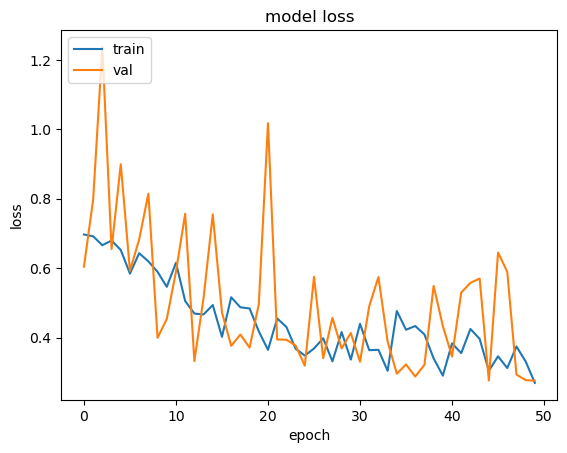

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [35]:
#model.save("FireDetector-v3.h5")

In [3]:
reconstructed_model = keras.models.load_model("FireDetector-v3.h5")

In [26]:
path=r"E:\Machine_Learning\PROJECTS\FireDetection\test\test7.jfif"
img = image.load_img(path,target_size = (224,224))
x = image.img_to_array(img)
x=np.expand_dims(x,axis=0)/255
classes = reconstructed_model.predict(x)
print(np.argmax(classes[0])==0,max(classes[0]))
classes


if np.argmax(classes[0])==0:
    print("FIRE")
else :
    print("NOT FIRE")

1/1 [==============================] - 0s 83ms/step
False 0.7189219
NOT FIRE
